In [141]:
import yfinance as yf
import datetime

START_DATE = "2025-01-01"

vix = yf.download("^VIX", start=START_DATE)
vix3m = yf.download("^VIX3M", start=START_DATE)
sp500 = yf.download("^GSPC", start=START_DATE)

C:\Users\limm1\AppData\Local\Temp\ipykernel_19304\3419023381.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vix = yf.download("^VIX", start=START_DATE)
[*********************100%***********************]  1 of 1 completed
C:\Users\limm1\AppData\Local\Temp\ipykernel_19304\3419023381.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vix3m = yf.download("^VIX3M", start=START_DATE)
[*********************100%***********************]  1 of 1 completed
C:\Users\limm1\AppData\Local\Temp\ipykernel_19304\3419023381.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", start=START_DATE)
[*********************100%***********************]  1 of 1 completed


In [142]:
vix.columns = vix.columns.get_level_values(0)
vix3m.columns = vix3m.columns.get_level_values(0)
sp500.columns = sp500.columns.get_level_values(0)

vix.drop(vix.index[-1], inplace=True)
vix.drop(columns=['Volume'], inplace=True)
vix3m.drop(columns=['Volume'], inplace=True)

In [143]:
import numpy as np 
import pandas as pd

spread = vix3m['Close'] - vix['Close'] 

rolling_mean = spread.rolling(window=10).mean()
rolling_std = spread.rolling(window=10).std()

z_score = (spread - rolling_mean) / rolling_std

result = pd.DataFrame({
    'VIX': vix['Close'],
    'VIX3M': vix3m['Close'],
    'Spread': spread,
    'Rolling_Mean': rolling_mean,
    'Rolling_Std': rolling_std,
    'Z_Score': z_score
})

### VIX3M and VIX spread

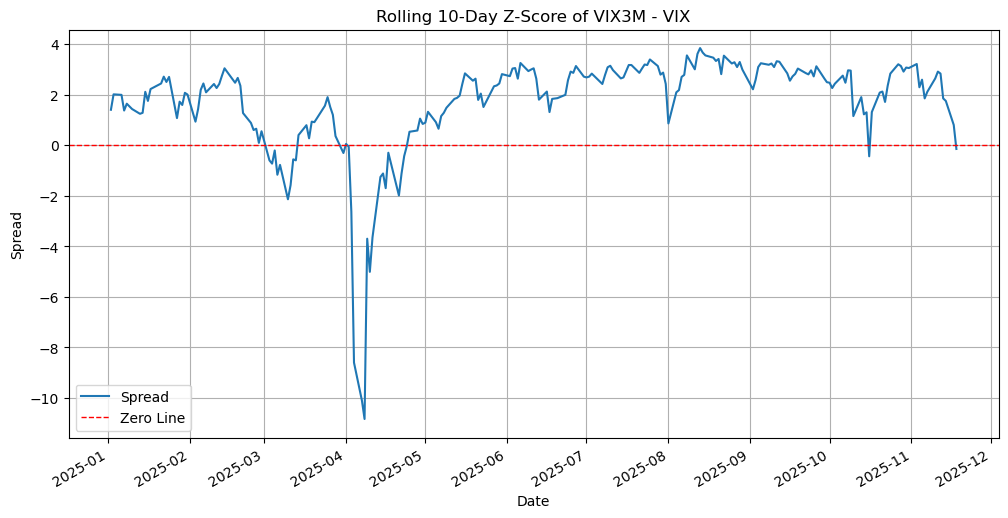

In [144]:
import matplotlib.pyplot as plt

result['Spread'].plot(title='Rolling 10-Day Z-Score of VIX3M - VIX', figsize=(12, 6))
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label='Zero Line')
plt.ylabel('Spread')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

In [145]:
negative_periods = spread < 0


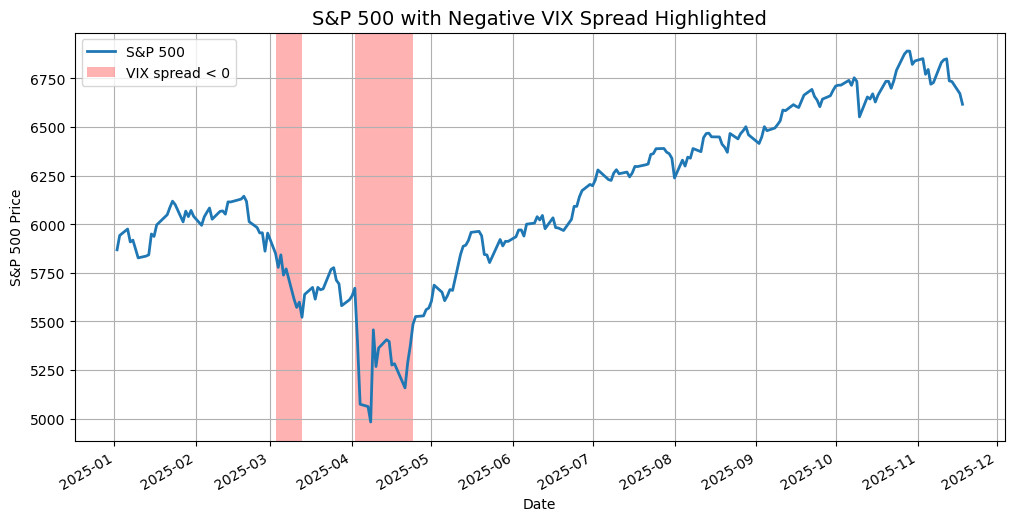

In [146]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

sp500['Close'].plot(ax=ax, label='S&P 500', linewidth=2)

ax.fill_between(sp500.index, 
                0,
                1, 
                where=negative_periods,
                alpha=0.3, 
                color='red',
                edgecolor='none',
                label='VIX spread < 0',
                transform=ax.get_xaxis_transform())

plt.title('S&P 500 with Negative VIX Spread Highlighted', fontsize=14)
plt.ylabel('S&P 500 Price')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

VIX3M and VIX spread can tell us market expectation for future volatility. A negative spread indicates **backwardation** in the equity option market. This is unusual market condition where shorter-dated options have higher implied volatilities than longer-dated options. Usually happens during period of heigtened near-term uncertainty and significant events.

### check option IV

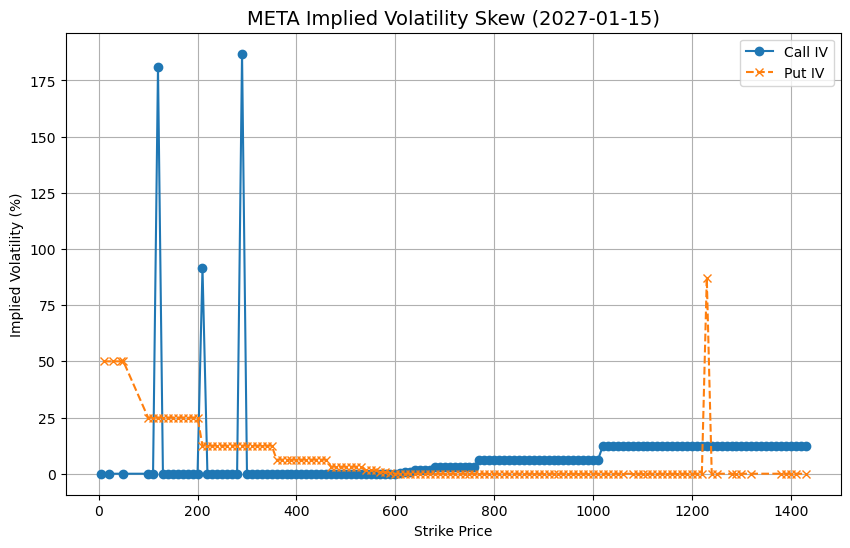

In [147]:
meta = yf.Ticker('META')

expiration_dates = meta.options



try:
    expiry_date = expiration_dates[-4] 
except IndexError:
    print("No options data available for this ticker.")

option_chain = meta.option_chain(expiry_date)

calls_df = option_chain.calls
puts_df = option_chain.puts

calls_for_plot = calls_df[['strike', 'impliedVolatility']].set_index('strike')
puts_for_plot = puts_df[['strike', 'impliedVolatility']].set_index('strike')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(calls_for_plot.index, 
        calls_for_plot['impliedVolatility'] * 100, # Convert to percentage
        'o-', 
        label='Call IV')

ax.plot(puts_for_plot.index, 
        puts_for_plot['impliedVolatility'] * 100, # Convert to percentage
        'x--', 
        label='Put IV')

ax.set_title(f'META Implied Volatility Skew ({expiry_date})', fontsize=14)
ax.set_xlabel('Strike Price')
ax.set_ylabel('Implied Volatility (%)')
ax.legend()
ax.grid(True)
plt.show()